# Importy

In [228]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
import time 

# MCKP Class with functions

In [229]:
import random as rn
import os


class MCKP:
    def __init__(self,class_number,item_numbers,max_combinationsombinations,number_of_iterations):
        self.init_locals(class_number,item_numbers,max_combinationsombinations,number_of_iterations)
        self.time_random = time.perf_counter()
        self.sol_random_x,self.sol_random_y = self.Random_search(self.class_number,self.item_numbers,self.max_combinationsombinations,self.number_of_iterations)
        self.time_random = time.perf_counter() - self.time_random
        self.first_choice_intitialization, self.choi_ls = [ ], [ ]
        self.time_simulted_annealing = time.perf_counter()
        self.init_locals(class_number,item_numbers,max_combinationsombinations,number_of_iterations)
        self.sol_simulated_an_x,self.sol_simulated_an_y = self.Sim_ann(self.class_number,self.item_numbers,self.max_combinationsombinations,self.number_of_iterations)
        self.time_simulted_annealing = time.perf_counter() - self.time_simulted_annealing


    def init_locals(self,class_number,item_numbers,max_combinationsombinations,number_of_iterations):
        self.class_number = class_number
        self.item_numbers = item_numbers
        self.max_combinationsombinations = max_combinationsombinations
        self.number_of_iterations = number_of_iterations
        self.classes = []
        self.combinations=[]
        self.sorted_viz_list =[]
        self.final_sum = 0
        self.class_n = [i+1 for i in range(5)]
        self.sorted_viz_list = [ ]
        self.final_sum = 0
        self.res_ls = []
        self.items_list = []
        self.first_choice_intitialization, self.choi_ls = [ ], [ ]

    def get_class_numbers(self,class_number,item_numbers):
        for _ in range(class_number):
            item_dic = { }
            for i in range(item_numbers):
                item_dic.update({i+1:[np.random.randint(1,50),np.random.randint(1,50)]})
            self.classes.append(item_dic)
        return self.classes

    def get_comb_mat(self,class_number,item_numbers):
        for _ in range(class_number):
            step = [ ]
            for i in range(item_numbers):
                step.append(i+1)
            self.combinations.append(step)
        return np.array(list(itertools.product(*self.combinations)))


    def new_comb(self,first_choice_intitialization,number_of_items, g_class):
        condition = False
        classes, prob = [0]*len(first_choice_intitialization), [(len(first_choice_intitialization)//len(first_choice_intitialization))/10]*len(first_choice_intitialization)
        classes = [classes[i]+i for i in range(len(classes))]
        while condition is not True:
            choice_idx, choice = rn.choices(classes, prob), rn.randint(1,number_of_items)
            if first_choice_intitialization[choice_idx[0]] != g_class[choice_idx[0]][choice]:
                condition = True
                first_choice_intitialization[choice_idx[0]] = g_class[choice_idx[0]][choice]
        
        return first_choice_intitialization    
    
    def get_viz(self):
        for i in range(len(self.items)):
            sorted_ls = [ ]
            sorted_ls.append(self.class_n[i])
            sorted_ls.append(self.items[i])
            sorted_ls.append(self.it_list[i][1])
            sorted_ls.append(self.it_list[i][0])
            self.final_sum += self.it_list[i][1]
            self.sorted_viz_list.append(sorted_ls)
        self.sorted_viz_list.append(['','Sum',self.final_sum,self.solution])
        DF = pd.DataFrame(self.sorted_viz_list)
        DF.columns = ['Class','Id','Capacity','Price']
        return DF 
    
    def init_choice(self,g_class):
        for item in g_class:
            choice = rn.randint(1,len(item))
            self.first_choice_intitialization.append(item[choice])
        return self.first_choice_intitialization    

    def Random_search(self,number_of_clases,number_of_items,max_combinations,number_of_iterations):
        curr_number = 10
        it_div = number_of_iterations//curr_number
        g_class = self.get_class_numbers(number_of_clases,number_of_items)
        first_choice_intitialization = self.init_choice(g_class)
        anealing_solution, anealing_solution_list = [0,max_combinations], [ ]
        for _ in range(it_div):
            for _ in range(curr_number):
                current_eval, current_limit = list(map(lambda ele: ele[0],first_choice_intitialization)), list(map(lambda ele: ele[1],first_choice_intitialization))
                current_eval, current_limit = sum(current_eval), sum(current_limit)
                if current_eval > anealing_solution[0] and current_limit < max_combinations:
                    anealing_solution = [current_eval,current_limit]
                first_choice_intitialization = self.new_comb(first_choice_intitialization,number_of_items,g_class)
                anealing_solution_list.append(anealing_solution[0])
        return anealing_solution, anealing_solution_list

    def Sim_ann(self,number_of_clases,number_of_items,max_combinations,number_of_iterations):
        curr_number = 10
        anealing_solution_list = []
        current_solution = [0,0]
        it_div = number_of_iterations//curr_number
        g_class =  self.get_class_numbers(number_of_clases,number_of_items)
        first_choice_intitialization= self.init_choice(g_class)
        anealing_solution = [0,max_combinations]
       
        
        for i in range(it_div):
            for _ in range(curr_number):
                current_eval, current_limit = list(map(lambda ele: ele[0],
                first_choice_intitialization)), list(map(lambda ele: ele[1],
                first_choice_intitialization))
                current_eval, current_limit = sum(current_eval), sum(current_limit)
                # if it %10 == 0:
                #     print(current_eval,current_limit)
                delta_fx = current_eval - current_solution[0]
                if delta_fx > 0 and current_limit < max_combinations:
                    current_solution = [current_eval,current_limit]
                if current_eval > anealing_solution[0] and current_limit < max_combinations:
                    anealing_solution = [current_eval,current_limit]
                else:
                    r = rn.uniform(0,1)
                    #print(r)
                    if r > np.power(np.e,-delta_fx/it_div):
                        #print(r)
                        current_solution = [current_eval,current_limit]

                it_div = it_div-0.7*i       
                first_choice_intitialization = self.new_comb(first_choice_intitialization,number_of_items,g_class)
                anealing_solution_list.append(anealing_solution[0])
        return anealing_solution, anealing_solution_list

    def show_plt(self):
        plot_x = [0]*self.number_of_iterations
        plot_x = [plot_x[i]+i for i in range(len(plot_x))]
        plt.plot(plot_x,self.sol_random_y, label = 'Random search')
        plt.plot(plot_x,self.sol_simulated_an_y, label = 'Simulated Annealing')
        plt.xticks(), plt.yticks()
        plt.ylabel('Kvalita')
        plt.legend()

    def show_results(self):
        print(f'Number of classes: {self.class_number}')
        print(f'Number of items: {self.item_numbers}')
        print(f'Random Price: {self.sol_random_x[0]}\n Random Sum: {self.sol_random_x[1]}\n Random Time: {self.time_random}')
        print(f'Simulated Annealing Price: {self.sol_simulated_an_x[0]}\n Simulated Annealing Sum: {self.sol_simulated_an_x[1]}\n Simulated Annealing Time: {self.time_simulted_annealing}')        

# Calling our class

In [230]:
mckp3=MCKP(15,3,300,40000)
mckp10 = MCKP(15,10,300,80000)

In [231]:
mckp3.show_results()
print('\n')
mckp10.show_results()

Number of classes: 15
Number of items: 3
Random Price: 509
 Random Sum: 299
 Random Time: 1.5074118999764323
Simulated Annealing Price: 469
 Simulated Annealing Sum: 298
 Simulated Annealing Time: 1.7224111999967135


Number of classes: 15
Number of items: 10
Random Price: 495
 Random Sum: 276
 Random Time: 2.522047200007364
Simulated Annealing Price: 599
 Simulated Annealing Sum: 256
 Simulated Annealing Time: 2.972553399973549


# Showing plot for 3 item class

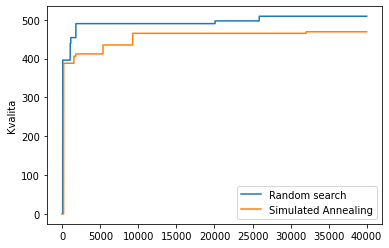

In [232]:
mckp3.show_plt()

# Showing plot for 10 item class

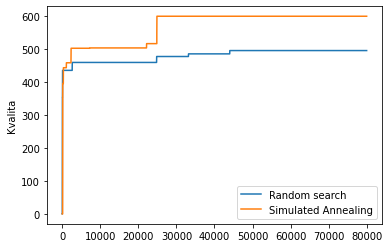

In [233]:
mckp10.show_plt()